# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('Car details v3.csv')
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# 1-Handling missing data

In [4]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean.mileage = data.mileage.fillna(data.mileage.mode()[0])
data_clean.engine = data.engine.fillna(data.engine.mode()[0])
data_clean.max_power  = data.max_power.fillna(data.max_power.mode()[0])
data_clean.torque = data.torque.fillna(data.torque.mode()[0])
data_clean.seats = data.seats.fillna(data.seats.mean())
data_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
data_clean.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

# 2-Encoding Categorical Data

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, 2].values
data_clean.drop("selling_price",axis=1,inplace = True)
X = data_clean.iloc[:, 1:].values
X.shape

(8128, 11)

In [8]:
X[0]

array([2014, 145500, 'Diesel', 'Individual', 'Manual', 'First Owner',
       '23.4 kmpl', '1248 CC', '74 bhp', '190Nm@ 2000rpm', 5.0],
      dtype=object)

In [9]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3,4,5,6,7,8,9])], remainder='passthrough')
X =ct.fit_transform(X).toarray()

In [10]:
print(X.shape)

(8128, 1294)


In [11]:
X = X[:2000]
y = y[:2000]

# 3-Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

# 4-Splitting the dataset into training and test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-Polynomial Regression

In [14]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
X_poly =poly.fit_transform(X_train)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)

LinearRegression()

In [15]:
import sklearn.metrics as sm
Y_pred = lin2.predict(X_poly)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_train, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_train, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 74616.55
Mean squared error train= 47089040746.08
Median absolute error train= 27984.0
Explain variance score train= 0.94
R2 score train= 0.94


## Visualising the Polynomial Regression results

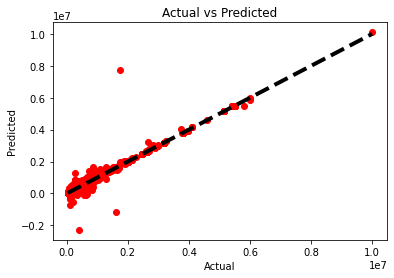

In [18]:
# Plotting actual vs predicted values
# Predict the target values
Y_pred = lin2.predict(X_poly)
plt.scatter(Y_train, Y_pred, color='red')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()